In [ ]:
import numpy as np

import pandas as pd

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense, Dropout
from keras.metrics import AUC

import keras_tuner as kt

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score

from scipy.stats.distributions import chi2

from IPython.display import clear_output

# CARREGANDO E TRATANDO DADOS

In [5]:
caminho = f'C:\\Users\\NEPS\\Desktop\\Murilo Thomes\\finalIA\\'
dados = pd.read_csv(caminho + 'dados.csv')

In [6]:
#Remove a coluna de índices
if "Unnamed: 0.1" in dados.columns:
    dados = dados.drop("Unnamed: 0.1", axis=1)
elif "Unnamed: 0" in dados.columns:
    dados = dados.drop("Unnamed: 0", axis=1)
dados


,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,Amostras_497,Amostras_498,Amostras_499,Amostras_500,classe,Freq_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-11.9287104248694-14.875441163193i,-2.63714438278631-14.1628903301632i,9.73905140697886-4.24308876347259i,-3.43817508699753-2.8378860807684i,0.938320862758085+5.95107087382504i,8.34466503900969+1.6684502012175i,8.77886551905124+8.3157768855802i,10.9624002530382+2.01821508312438i,4.19255303664547+5.1380440057899i,8.489090178271+12.2496259592486i,...,-28.9453463142943-21.6304959537416i,-9.19706269084625-4.7768259353937i,9.01423925727307-10.1986834977578i,10.8333209474169+4.1303505528859i,1,33,40,70,Fz,AH
1,5.66665098295756-5.73863696753984i,9.34414941536059-5.20427593084129i,3.3898302601677-11.5270457678019i,3.14738280266078-2.34459462857865i,-7.21764374881923-6.31323753300691i,9.47886518313603+0.200072129045863i,5.08831951684019-5.29782869354779i,16.7717167465448+5.85075431837294i,5.21140736817612-2.50991292686624i,-8.31799871316987-1.95038263571372i,...,-7.77465828570368+6.67007688514336i,-16.3066217132743-1.33421106945253i,15.7168302816696+1.66835119876892i,-8.22206670206577+9.88365693946781i,1,37,40,70,Fz,AH
2,5.03028213137088+3.47361196230173i,-8.13721439651841-1.54700800702243i,-3.49032348809159-6.66477217226851i,-6.31856869684226+1.36460382685254i,-5.21954769011709+1.91627182728754i,10.3586555260325+19.1357487143088i,-3.45204256695516+0.342587220032595i,6.42602420941557+10.2961333905352i,0.497455231380335+3.93198354291971i,8.29572494083051-6.29351136704858i,...,-0.702039368136772-6.47090923634808i,-1.90915569723743+0.038460878155894i,1.87654516838996-3.85444284179093i,-2.53931374086284-8.18505752611262i,1,41,40,70,Fz,AH
3,-2.69437552533651-0.443265571662665i,2.26297505445924-4.32979978993325i,0.878647306471491-1.96030684712897i,11.0077443304137-2.79243994148609i,-14.5506837064631-9.21217511179037i,-1.65928041963358+4.1664351549347i,3.03285429976141-4.5718040583682i,-5.50383427622592+1.18211072326647i,-2.64321560104519+2.31977905364747i,5.15143673656233+7.14796532809706i,...,3.98637655597113+9.47765688816421i,0.997033700699956-9.35423387583864i,-3.36588504598374-9.64001409114187i,1.16062075000301+13.1098799183474i,1,45,40,70,Fz,AH
4,-14.1060396536154-11.9635989992521i,-3.09273257435156-10.5939169051076i,15.1230979200572+9.05970772430038i,-2.7337558296306+11.6971923757082i,-8.03980363779999+4.43023371717983i,-0.446586928611119+2.3003852581034i,5.90963584175537+11.5878523587431i,-5.90589543505183-1.89264297146193i,-5.75710935013775-5.63953389646059i,15.9100049379377+6.03935321543916i,...,-2.7319403539445+0.311077933404636i,-2.75289128653264+7.35270460275029i,17.2120994723809-1.01519107216341i,-12.9170268288462+11.2994210537745i,1,35,40,70,Fz,AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,32.0675933985445-15.7882512235903i,6.5175161391493+11.1342724674828i,4.0180296485829+1.43213104271851i,-3.56497077059639-8.57142055469081i,5.45950386516621-5.03544079960791i,-4.06201014251449-1.20882986556793i,1.13492387727523-0.0883432765499335i,2.803052890389-2.86696486336965i,1.56748090549975+11.4012255680192i,2.69887790537886+1.45563585379759i,...,-0.479642508293014+0.994333285673546i,-0.485813633718795-0.703780592104743i,1.12132683933879-2.61612579023881i,-0.335184113272592-1.67954555355317i,0,72,80,50,P4,YR
9572,20.0622253907161-3.23754592015122i,0.284805450501868+1.39412362757818i,3.256302772848-6.41845652495357i,-5.00017206204408-1.93193602025046i,10.4828208741325+1.55138412818652i,-8.14383699829198+1.04730461721524i,-2.64240150291203-3.6763594323524i,6.48875747772556+0.565734859133117i,-3.09276617468449-0.308591542598793i,-0.488217922051802-6.11722515415276i,...,-1.48123780151917-0.319452779706896i,-4.06889890510952-1.36174120016084i,-1.14917418717343+1.66134916713491i,0.285944628343185+0.45111880907866i,0,74,80,50,P4,YR
9573,13.6224584713668-4.

In [ ]:
def tratarDados(data, janelas = 500, testSize = 0.3, validSize = 0.2):

    #transforma o itens do data frame em números complexos

    colunas = data.keys()
    def magica(x):
        try:
            return complex(x.replace("i","j"))
        except:
            return complex(x)
    preData = data[colunas[:janelas]].applymap(magica)
    data = pd.concat([preData, data[colunas[janelas:]]],axis=1)

    try:
        data = data.drop(columns=['voluntario','Intensidade_db', 'Faixa_Moduladora', 'Freq_analisada_Hz', 'Canal'], axis=1)
    except:
      pass

    #embaralha os daddos
    data = shuffle(data,random_state=26)

    dataTrain, testeData = train_test_split(data, test_size=testSize, random_state=26)

    yComp = data['classe']
    xComp = data.drop(columns=['classe'], axis=1)

    xComp = xComp.to_numpy()
    yComp = yComp.to_numpy()

    yTeste = testeData['classe']
    xTeste = testeData.drop(columns=['classe'], axis=1)

    yTrain = dataTrain['classe']
    xTrain = dataTrain.drop(columns=['classe'], axis=1)

    xTrain = xTrain.to_numpy()
    xTrain = abs(xTrain)
    yTrain = yTrain.to_numpy()

    xTeste = xTeste.to_numpy()
    xTeste = abs(xTeste)
    yTeste = yTeste.to_numpy()

    scaler = StandardScaler()

    xTrain = scaler.fit_transform(xTrain)
    xTeste = scaler.transform(xTeste)

    return xTrain, xTeste, yTrain, yTeste, xComp, yComp


# CONSTRUINDO O MODELO RNA

### CRIANDO A TOPOLOGIA DO MODELO

In [ ]:
def contruirModelo(learning_rate=0.001, n_hidden=5, n_neurons=200, kernel_size=3, pool_size=2,
                   optimizer='adam', input_shape=(500,), drop = 0.2, hidden_func = 'relu'):
    keras.backend.clear_session()
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = Sequential()
    model.add(Conv1D(250, kernel_size=kernel_size, activation='relu', input_shape=(500,1)))

    model.add(Flatten())

    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation = hidden_func))
        Dropout(drop)

    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[AUC()])
    return model

In [ ]:
def findP(hp):
    keras.backend.clear_session()
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=20, default=2)
    n_neurons = hp.Int("n_neurons", min_value=1, max_value=1000)
    learning_rate = hp.Float("learning_rate", min_value=1e-6, max_value=1e-2,
                             sampling="log")

    hidden_func = hp.Choice("hidden_func", values=["relu", "tanh"])
    drop = hp.Float('drop', min_value=0.05, max_value=0.8, default=0.2)

    kernel_size = hp.Int("kernel_size", min_value=1, max_value=10, default=3)

    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = Sequential()
    model.add(Conv1D(250, kernel_size=kernel_size, activation='relu', input_shape=(500,1)))
    model.add(Flatten())

    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation = hidden_func))
        Dropout(drop)

    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[AUC()])
    return model

In [ ]:
def predModel(xTeste, yTeste):
    yPred= kerasClas.predict(xTeste)
    auc = roc_auc_score(yTeste,yPred)
    return roc_curve(yTeste, yPred), auc, yPred


In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    # Definir a figura com tamanho e DPI alto

    # Plotar a curva ROC
    plt.plot(fpr, tpr, linewidth=2, label=label)

    # Plotar a linha diagonal
    plt.plot([0, 1], [0, 1], 'k--')

    # Definir os limites dos eixos
    plt.axis([0, 1, 0, 1])

    # Adicionar rótulos e título com fontes maiores
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.title('Curva ROC', fontsize=20)

    # Adicionar uma grade e uma legenda com fontes maiores
    plt.grid(True)
    plt.legend(fontsize=14)

    # Ajustar o layout para evitar sobreposição
    #plt.tight_layout()

    # Mostrar o gráfico

# MSC


In [23]:
def msc(x, y, M = 500, alfa=0.05):
    #cáculo da MSC
    MSC=(np.abs(np.sum(x,axis=1))**2)/(M*np.sum((np.abs(x)**2),axis=1))
    #valor crítico da MSC
    vcMSC = 1 - (alfa**(1/(M-1)))
    #previsões
    decMSC = MSC > vcMSC
    decMSC = np.multiply(decMSC,1)
    #Curva roc msc
    #plot_roc_curve(fprMSC, tprMSC, 'MSC')
    auc = roc_auc_score(y, MSC)
    #auc
    return roc_curve(y, MSC), auc, MSC

# CSM


In [ ]:
def csm(x, y, M=500, alfa=0.05):
    angulo = np.angle(x)
    angulo.shape
    #Cáculo da csm
    CSM = ((1/M)*np.sum(np.cos(angulo),axis=1))**2 +((1/M)*np.sum(np.sin(angulo),axis=1))**2
    #cálculo do valor crítico da csm

    vcCSM=chi2.ppf(1-alfa, df=2)/(2*M)
    #previsões
    decCSM = CSM > vcCSM
    decCSM = np.multiply(decCSM,1)
    #curva roc csm
    #plot_roc_curve(fprCSM, tprCSM, 'CSM')
    auc = roc_auc_score(y, CSM)
    return roc_curve(y, CSM), auc, CSM

# COMPARANDO DETECTORES


In [25]:
def plotAll(fprRNA, tprRNA, fprMSC, tprMSC, fprCSM, tprCSM, label='RNA', pngName = 'conv1D'):

    plot_roc_curve(fprRNA, tprRNA, label=label)
    plot_roc_curve(fprMSC, tprMSC, 'MSC')
    plot_roc_curve(fprCSM, tprCSM, 'CSM')
    plt.axvline(x=0.05, color='gray', linestyle='--')
    plt.savefig(f'{caminho}//{pngName}.png')
    plt.show()

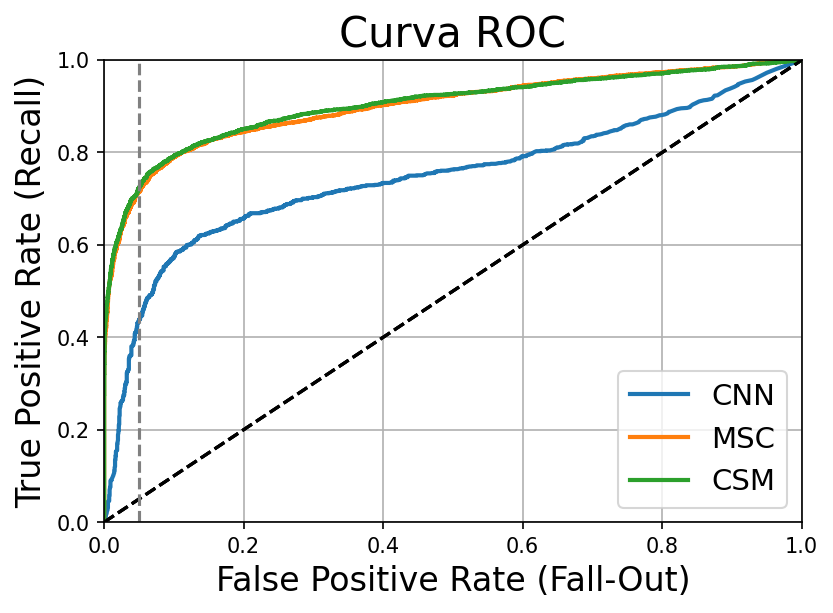

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)

caminho = f'{caminho}'

xTrain, xTeste, yTrain, yTeste, xComp, yComp = tratarDados(dados)  # separa as variáveis

tuner = kt.BayesianOptimization(
    findP,
    objective=kt.Objective("auc", direction="max"),
    max_trials=40,  # Número de tentativas de hiperparâmetros
    executions_per_trial=1,  # Número de execuções por tentativa
    directory=f'{caminho}',
    project_name='CNN'  # Nome do projeto do sintonizador
)

tuner.search(xTrain, yTrain, epochs=100,
             callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)])

#parans = tuner.get_best_hyperparameters(num_trials=1)[0].values

resultados = {'auc_RNA': [], 'F1Score_RNA': [], 'FPR_RNA': [], 'txDET_RNA': [],
              'auc_MSC': [], 'F1Score_MSC': [], 'FPR_MSC': [], 'txDET_MSC': [],
              'n_hidden': [], 'n_neurons': [], 'learning_rate': [], 'optimizer': [],
              'hidden_func': [], 'kernel_size' : [], 'drop' : []}

for i in tuner.get_best_hyperparameters(num_trials=30):
  parans = i.values

  early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
  callbacks = [early_stopping_cb]

  kerasClas = contruirModelo(n_hidden=parans['n_hidden'], n_neurons=parans['n_neurons'], learning_rate=parans['learning_rate'],
                            optimizer=parans['optimizer'], drop=parans['drop'], kernel_size=parans['kernel_size'], hidden_func = parans['hidden_func'] )

  kerasClas.fit(xTrain, yTrain, epochs=150, callbacks=callbacks)

  [fprRNA, tprRNA, thresholds], aucrna, Y = predModel(xTeste, yTeste)

  indice = next((i for i, x in enumerate(fprRNA) if x > 0.05), None)  # encontra o índice do primeiro valor de falso positivo maior que 0.05
  Y = Y > thresholds[indice-1]
  Y = np.multiply(Y, 1)
  TP, FP, FN, TN = confusion_matrix(yTeste, Y).ravel()
  F1rna = f1_score(yTeste, Y)
  FPRrna = fprRNA[indice-1] * 100
  txDETrna = (TP / (TP + FP)) * 100

  [fprMSC, tprMSC, thresholds], aucmsc, Y = msc(xComp, yComp)

  indice = next((i for i, x in enumerate(fprMSC) if x > 0.05), None)
  Y = Y > thresholds[indice-1]
  Y = np.multiply(Y, 1)
  TP, FP, FN, TN = confusion_matrix(yComp, Y).ravel()
  F1msc = f1_score(yComp, Y)
  FPRmsc = fprMSC[indice-1] * 100
  txDETmsc = (TP / (TP + FP)) * 100

  [fprCSM, tprCSM, thresholds], auccsm, Y = csm(xComp, yComp)

  indice = next((i for i, x in enumerate(fprCSM) if x > 0.05), None)
  Y = Y > thresholds[indice-1]
  Y = np.multiply(Y, 1)
  TP, FP, FN, TN = confusion_matrix(yComp, Y).ravel()
  F1csm = f1_score(yComp, Y)
  FPRcsm = fprCSM[indice-1] * 100
  txDETcsm = (TP / (TP + FP)) * 100

  #salva as métricas da rede
  resultados['auc_RNA'].append(aucrna)
  resultados['F1Score_RNA'].append(F1rna)
  resultados['FPR_RNA'].append(FPRrna)
  resultados['txDET_RNA'].append(txDETrna)

  resultados['auc_MSC'].append(aucmsc)
  resultados['F1Score_MSC'].append(F1msc)
  resultados['FPR_MSC'].append(FPRmsc)
  resultados['txDET_MSC'].append(txDETmsc)

  resultados['n_hidden'].append(parans['n_hidden'])
  resultados['n_neurons'].append(parans['n_neurons'])
  resultados['learning_rate'].append(parans['learning_rate'])
  resultados['optimizer'].append(parans['optimizer'])
  resultados['hidden_func'].append(parans['hidden_func'])
  resultados['kernel_size'].append(parans['kernel_size'])
  resultados['drop'].append(parans['drop'])

  resulPD = pd.DataFrame(resultados)
  resulPD.to_csv(caminho + 'resultadosCNN.csv', index = False)

  clear_output(wait=True)

resulPD = pd.DataFrame(resultados)
resulPD.to_csv(caminho + 'resultadosCNN.csv', index = False)